In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Read the total number of rows in each dataset
courses_total_rows = sum(1 for line in open('data/courses.csv')) - 1  # Exclude header row
assessments_total_rows = sum(1 for line in open('data/assessments.csv')) - 1
vle_total_rows = sum(1 for line in open('data/vle.csv')) - 1
student_info_total_rows = sum(1 for line in open('data/studentInfo.csv')) - 1
student_registration_total_rows = sum(1 for line in open('data/studentRegistration.csv')) - 1
student_assessment_total_rows = sum(1 for line in open('data/studentAssessment.csv')) - 1
student_vle_total_rows = sum(1 for line in open('data/studentVle.csv')) - 1

# Calculate the sample size (10% of total rows)
sample_size_courses = int(courses_total_rows * 0.1)
sample_size_assessments = int(assessments_total_rows * 0.1)
sample_size_vle = int(vle_total_rows * 0.1)
sample_size_student_info = int(student_info_total_rows * 0.1)
sample_size_student_registration = int(student_registration_total_rows * 0.1)
sample_size_student_assessment = int(student_assessment_total_rows * 0.1)
sample_size_student_vle = int(student_vle_total_rows * 0.1)



# Read sample datasets
courses_sample = pd.read_csv("data/courses.csv", nrows=sample_size_courses)
assessments_sample = pd.read_csv("data/assessments.csv", nrows=sample_size_assessments)
vle_sample = pd.read_csv("data/vle.csv", nrows=sample_size_vle)
student_info_sample = pd.read_csv("data/studentInfo.csv", nrows=sample_size_student_info)
student_registration_sample = pd.read_csv("data/studentRegistration.csv", nrows=sample_size_student_registration)
student_assessment_sample = pd.read_csv("data/studentAssessment.csv", nrows=sample_size_student_assessment)
student_vle_sample = pd.read_csv("data/studentVle.csv", nrows=sample_size_student_vle)

# Merge sample datasets
# Merge student information with registration information
student_data_sample = pd.merge(student_info_sample, student_registration_sample, on=['code_module', 'code_presentation', 'id_student'], how='left')

# Merge with VLE interactions
student_data_sample = pd.merge(student_data_sample, student_vle_sample, on=['code_module', 'code_presentation', 'id_student'], how='left')

# Merge with assessment results using id_student
student_data_sample = pd.merge(student_data_sample, student_assessment_sample, on='id_student', how='left')

# Feature engineering
# Example: Total interactions with VLE materials
total_interactions = student_data_sample.groupby(['id_student']).sum()['sum_click'].reset_index()
total_interactions.rename(columns={'sum_click': 'total_interactions'}, inplace=True)
student_data_sample = pd.merge(student_data_sample, total_interactions, on='id_student', how='left', suffixes=('_original', '_total_interactions'))



# Encoding categorical variables
student_data_sample = pd.get_dummies(student_data_sample, columns=['gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability'])
print(student_data_sample.columns)


Index(['code_module', 'code_presentation', 'id_student',
       'num_of_prev_attempts', 'studied_credits', 'final_result',
       'date_registration', 'date_unregistration', 'id_site', 'date',
       'sum_click', 'id_assessment', 'date_submitted', 'is_banked', 'score',
       'total_interactions', 'gender_F', 'gender_M',
       'region_East Anglian Region', 'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'highest_education_A Level or Equivalent',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification', 'imd_band_0-10%',
       'imd_band_10-20', 'imd_band_20-30%', 'i

Accuracy: 0.9999732273250557
              precision    recall  f1-score   support

 Distinction       1.00      1.00      1.00    208730
        Fail       1.00      1.00      1.00    112477
        Pass       1.00      1.00      1.00    771415
   Withdrawn       1.00      1.00      1.00     65275

    accuracy                           1.00   1157897
   macro avg       1.00      1.00      1.00   1157897
weighted avg       1.00      1.00      1.00   1157897



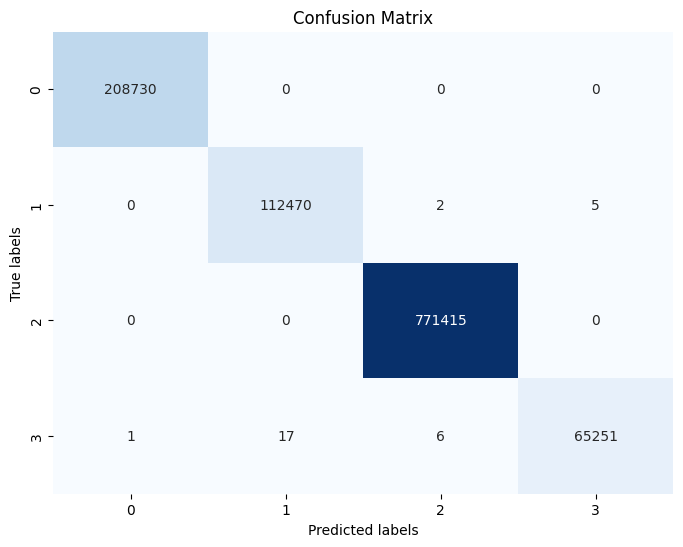

KeyboardInterrupt: 

In [29]:



# Update the features list to include only the new columns after one-hot encoding
features = ['num_of_prev_attempts', 'studied_credits', 'total_interactions',
            'gender_F', 'gender_M', 'region_East Anglian Region',
            'region_East Midlands Region', 'region_Ireland', 'region_London Region',
            'region_North Region', 'region_North Western Region', 'region_Scotland',
            'region_South East Region', 'region_South Region', 'region_South West Region',
            'region_Wales', 'region_West Midlands Region', 'region_Yorkshire Region',
            'highest_education_A Level or Equivalent', 'highest_education_HE Qualification',
            'highest_education_Lower Than A Level', 'highest_education_No Formal quals',
            'highest_education_Post Graduate Qualification', 'imd_band_0-10%', 'imd_band_10-20',
            'imd_band_20-30%', 'imd_band_30-40%', 'imd_band_40-50%', 'imd_band_50-60%',
            'imd_band_60-70%', 'imd_band_70-80%', 'imd_band_80-90%', 'imd_band_90-100%',
            'age_band_0-35', 'age_band_35-55', 'age_band_55<=', 'disability_N', 'disability_Y']

# Splitting data into train and test sets
X = student_data_sample[features]
y = student_data_sample['final_result']  # Assuming 'final_result' indicates student withdrawal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Model evaluation
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()







In [31]:
# Feature Importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
                                           Feature  Importance
2                              total_interactions    0.373130
1                                 studied_credits    0.059190
0                            num_of_prev_attempts    0.034112
28                                imd_band_50-60%    0.021203
26                                imd_band_30-40%    0.020430
4                                        gender_M    0.019831
34                                 age_band_35-55    0.019716
3                                        gender_F    0.019375
11                                region_Scotland    0.019346
27                                imd_band_40-50%    0.018824
25                                imd_band_20-30%    0.018821
33                                  age_band_0-35    0.018413
29                                imd_band_60-70%    0.018359
18        highest_education_A Level or Equivalent    0.018190
8                            region_London Region

In [37]:
# ROC-AUC Score
y_proba = rf_classifier.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_proba, average='macro', multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9999999978530897


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Read a sample of data from CSV files
student_info = pd.read_csv("data/studentInfo.csv").sample(frac=0.1, random_state=42)
student_registration = pd.read_csv("data/studentRegistration.csv").sample(frac=0.1, random_state=42)
student_assessment = pd.read_csv("data/studentAssessment.csv").sample(frac=0.1, random_state=42)
student_vle = pd.read_csv("data/studentVle.csv").sample(frac=0.1, random_state=42)
courses = pd.read_csv("data/courses.csv").sample(frac=0.1, random_state=42)

# Merge relevant datasets
student_data = pd.merge(student_info, student_registration, on=["code_module", "code_presentation", "id_student"], how="left")
student_data = pd.merge(student_data, student_assessment, on="id_student", how="left")
student_data = pd.merge(student_data, student_vle, on=["code_module", "code_presentation", "id_student"], how="left")
student_data = pd.merge(student_data, courses, on=["code_module", "code_presentation"], how="left")

# Print columns of the student_data DataFrame
print(student_data.columns)


Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'date_registration',
       'date_unregistration', 'id_assessment', 'date_submitted', 'is_banked',
       'score', 'id_site', 'date', 'sum_click', 'module_presentation_length'],
      dtype='object')


In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from CSV files
student_info = pd.read_csv("data/studentInfo.csv").sample(frac=0.1, random_state=42)
student_registration = pd.read_csv("data/studentRegistration.csv").sample(frac=0.1, random_state=42)
student_assessment = pd.read_csv("data/studentAssessment.csv").sample(frac=0.1, random_state=42)
student_vle = pd.read_csv("data/studentVle.csv").sample(frac=0.1, random_state=42)
courses = pd.read_csv("data/courses.csv").sample(frac=0.1, random_state=42)
assessments = pd.read_csv("data/assessments.csv").sample(frac=0.1, random_state=42)

# Step 1: Merge student_assessment with student_info
merged_data = pd.merge(student_assessment, student_info, on='id_student', how='left')

# Step 2: Merge merged_data with courses
merged_data = pd.merge(merged_data, courses, on=['code_module', 'code_presentation'], how='left')

# Step 3: Merge with student_registration
merged_data = pd.merge(merged_data, student_registration, on=['code_module', 'code_presentation', 'id_student'], how='left')

# Step 4: Merge with student_vle
merged_data = pd.merge(merged_data, student_vle, on=['code_module', 'code_presentation', 'id_student'], how='left')

# Step 5: Merge with assessments
final_merged_data = pd.merge(merged_data, assessments, on='id_assessment', how='left')

# Rename duplicated columns
final_merged_data.rename(columns={'code_module_x': 'code_module', 'code_presentation_x': 'code_presentation'}, inplace=True)

# Drop duplicated columns
final_merged_data.drop(['code_module_y', 'code_presentation_y'], axis=1, inplace=True)


# Identify categorical columns
categorical_cols = final_merged_data.select_dtypes(include=['object']).columns

# Perform one-hot encoding for categorical columns
final_merged_data = pd.get_dummies(final_merged_data, columns=categorical_cols)


print(final_merged_data.columns)


Index(['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score',
       'num_of_prev_attempts', 'studied_credits', 'module_presentation_length',
       'date_registration', 'date_unregistration', 'id_site', 'date_x',
       'sum_click', 'date_y', 'weight', 'code_module_AAA', 'code_module_BBB',
       'code_module_CCC', 'code_module_DDD', 'code_module_EEE',
       'code_module_FFF', 'code_module_GGG', 'code_presentation_2013B',
       'code_presentation_2013J', 'code_presentation_2014B',
       'code_presentation_2014J', 'gender_F', 'gender_M',
       'region_East Anglian Region', 'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'highest_education_A Level or Equivalent',
       'highest_

Accuracy: 0.9983179142136249
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21604
           1       1.00      0.96      0.98       987

    accuracy                           1.00     22591
   macro avg       1.00      0.98      0.99     22591
weighted avg       1.00      1.00      1.00     22591



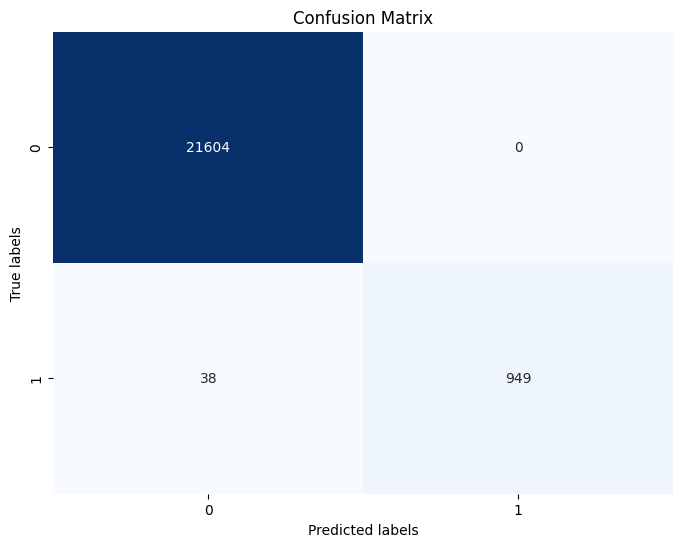

Feature Importances: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
Columns in all_features DataFrame: Index(['id_student', 'gender_F', 'gender_M', 'region_East Anglian Region',
       'region_East Midlands Region', 'region_Ireland', 'region_London Region',
       'region_North Region', 'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'highest_education_A Level or Equivalent',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification', 'imd_band_0-10%',
       'imd_band_10-20', 'imd_band_20-30%'

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from CSV files
student_info = pd.read_csv("data/studentInfo.csv").sample(frac=0.1, random_state=42)
student_registration = pd.read_csv("data/studentRegistration.csv").sample(frac=0.1, random_state=42)
student_assessment = pd.read_csv("data/studentAssessment.csv").sample(frac=0.1, random_state=42)
student_vle = pd.read_csv("data/studentVle.csv").sample(frac=0.1, random_state=42)
courses = pd.read_csv("data/courses.csv").sample(frac=0.1, random_state=42)
assessments = pd.read_csv("data/assessments.csv").sample(frac=0.1, random_state=42)

# Merge student_assessment with student_info
merged_data = pd.merge(student_assessment, student_info, on='id_student', how='left')

# Merge merged_data with courses
merged_data = pd.merge(merged_data, courses, left_on=['code_module', 'code_presentation'], right_on=['code_module', 'code_presentation'], how='left')

# Merge with student_registration
merged_data = pd.merge(merged_data, student_registration, on=['code_module', 'code_presentation', 'id_student'], how='left')

# Merge with student_vle
merged_data = pd.merge(merged_data, student_vle, on=['code_module', 'code_presentation', 'id_student'], how='left')

# Merge with assessments
final_merged_data = pd.merge(merged_data, assessments, on='id_assessment', how='left')

# Fill missing values in the 'score' column with the mean
final_merged_data['score'] = final_merged_data['score'].fillna(final_merged_data['score'].mean())


# Drop duplicated columns
final_merged_data.drop(['code_module_y', 'code_presentation_y'], axis=1, inplace=True)

# Rename duplicated columns
final_merged_data.rename(columns={'code_module_x': 'code_module', 'code_presentation_x': 'code_presentation'}, inplace=True)

# Enrollment information
final_merged_data["days_since_registration"] = -final_merged_data["date_registration"]  # Assuming negative values indicate days before start

# Assessment features
assessment_features = final_merged_data.groupby("id_student").agg({"score": ["mean", "count"]}).reset_index()
assessment_features.columns = ["id_student", "avg_score", "num_assessments"]
final_merged_data = pd.merge(final_merged_data, assessment_features, on="id_student", how="left")

# VLE interaction features
vle_interaction = final_merged_data.groupby("id_student")["sum_click"].sum().reset_index(name="total_clicks")
final_merged_data = pd.merge(final_merged_data, vle_interaction, on="id_student", how="left")

# Course features
final_merged_data = pd.merge(final_merged_data, courses[["code_module", "code_presentation", "module_presentation_length"]], on=["code_module", "code_presentation"], how="left")

# One-hot encoding
final_merged_data = pd.get_dummies(final_merged_data)

# Define columns related to personal information and course interaction
personal_info_cols = ['id_student', 'gender_F', 'gender_M', 'region_East Anglian Region', 
                      'region_East Midlands Region', 'region_Ireland', 'region_London Region', 
                      'region_North Region', 'region_North Western Region', 'region_Scotland', 
                      'region_South East Region', 'region_South Region', 'region_South West Region', 
                      'region_Wales', 'region_West Midlands Region', 'region_Yorkshire Region', 
                      'highest_education_A Level or Equivalent', 'highest_education_HE Qualification', 
                      'highest_education_Lower Than A Level', 'highest_education_No Formal quals', 
                      'highest_education_Post Graduate Qualification', 'imd_band_0-10%', 'imd_band_10-20', 
                      'imd_band_20-30%', 'imd_band_30-40%', 'imd_band_40-50%', 'imd_band_50-60%', 
                      'imd_band_60-70%', 'imd_band_70-80%', 'imd_band_80-90%', 'imd_band_90-100%', 
                      'age_band_0-35', 'age_band_35-55', 'age_band_55<=', 'disability_N', 'disability_Y']

course_interaction_cols = ['id_assessment', 'date_submitted', 'is_banked', 'score', 'num_of_prev_attempts', 
                           'studied_credits', 'module_presentation_length_x', 'date_registration', 
                           'date_unregistration', 'id_site', 'date_x', 'sum_click', 'date_y', 'weight', 
                           'code_presentation_2013B', 'code_presentation_2013J', 'code_presentation_2014B', 
                           'code_presentation_2014J', 'assessment_type_CMA', 'assessment_type_Exam', 
                           'assessment_type_TMA']

# Extract personal info features
personal_info = final_merged_data[personal_info_cols]

# Extract course interaction features
course_interaction = final_merged_data[course_interaction_cols]

# Concatenate personal info and course interaction features
all_features = pd.concat([personal_info, course_interaction], axis=1)

# Prepare target variable
target = (final_merged_data["final_result_Withdrawn"] == 1).astype(int)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(all_features, target, test_size=0.2, random_state=42)

# Train the model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



# Train the model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
importances = rf_classifier.feature_importances_
print("Feature Importances:", importances)

# Verify the content of all_features DataFrame
print("Columns in all_features DataFrame:", all_features.columns)
print("Head of all_features DataFrame:")
print(all_features.head())

# Continue with feature importance visualization...




In [31]:
# Check for missing values
missing_values = final_merged_data.isnull()

# Summarize missing data
missing_counts = missing_values.sum()

# Check data types
data_types = final_merged_data.dtypes

# Combine missing counts and data types into a DataFrame
missing_info = pd.DataFrame({'Missing Count': missing_counts, 'Data Type': data_types})

# Display missing information
print("Missing Data Summary:")
print(missing_info)


Missing Data Summary:
                        Missing Count Data Type
id_assessment                       0     int64
id_student                          0     int64
date_submitted                      0     int64
is_banked                           0     int64
score                              55   float64
...                               ...       ...
final_result_Pass                   0      bool
final_result_Withdrawn              0      bool
assessment_type_CMA                 0      bool
assessment_type_Exam                0      bool
assessment_type_TMA                 0      bool

[73 rows x 2 columns]
